In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Install TensorFlow
try:
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# 퍼셉트론

In [0]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # tol float The stopping criterion. 
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [0]:
y_pred

array([1])

Saving figure perceptron_iris_plot


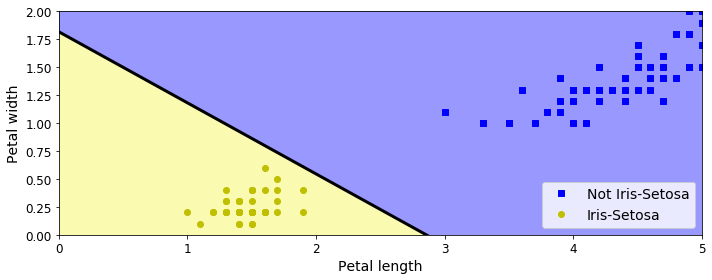

In [0]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# 활성화 함수

Saving figure activation_functions_plot


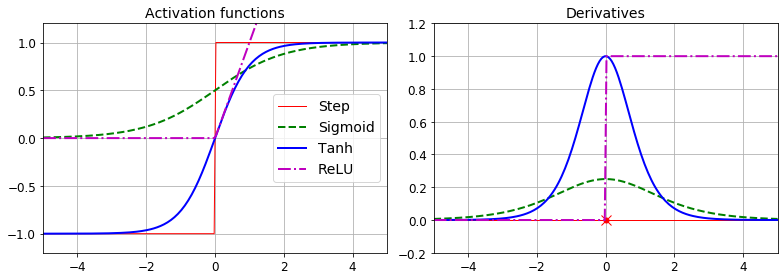

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

# Fashion-MNIST 데이터셋 분류

In [0]:
from tensorflow import keras

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [0]:
type(X_train_full)

numpy.ndarray

In [0]:
X_train_full.shape

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
X_train_full.dtype

dtype('uint8')

In [0]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

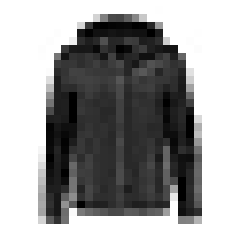

In [0]:
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")
plt.show()

In [0]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
               "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
class_names[y_train[0]]

'Coat'

In [0]:
print(X_valid.shape)
print(X_test.shape)

(5000, 28, 28)
(10000, 28, 28)


In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [0]:
model.layers

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_6 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                3010      
Total params: 509,410
Trainable params: 509,410
Non-trainable params: 0
________________________________________________

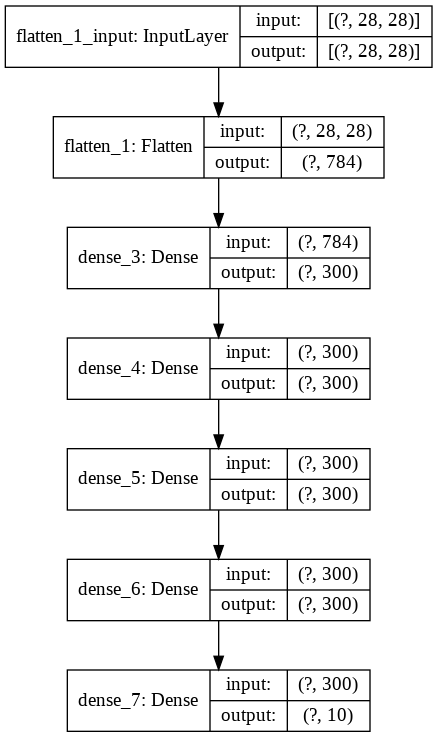

In [0]:
keras.utils.plot_model(model, "saf.png", show_shapes=True)

In [0]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [0]:
model.layers[2].name

'dense_4'

In [0]:
model.get_layer(hidden1.name) is hidden1

True

In [0]:
weights, biases = hidden1.get_weights()

In [0]:
weights

array([[-0.00357432,  0.04984073,  0.02745937, ...,  0.03102107,
         0.01210754, -0.04243026],
       [ 0.06463087, -0.02043685,  0.05757268, ..., -0.07154929,
         0.01237125, -0.0106568 ],
       [ 0.04900268,  0.07133389,  0.05621415, ...,  0.0650575 ,
        -0.05704001,  0.01597794],
       ...,
       [ 0.00925682,  0.05029631,  0.0229748 , ...,  0.00313266,
        -0.06571893,  0.06153049],
       [ 0.05688915,  0.06417282, -0.03503877, ..., -0.02586005,
         0.05274881,  0.05713208],
       [ 0.05926991, -0.02443263, -0.02010133, ..., -0.00817151,
        -0.04241591,  0.06774761]], dtype=float32)

In [0]:
weights.shape

(784, 300)

In [0]:
biases.shape

(300,)

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])

In [0]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [0]:
import time

start_time = time.time()

history = model.fit(X_train, y_train, epochs = 30,
                    validation_data=(X_valid,y_valid))

print(time.time()-start_time)
# 184.6670503616333 CPU
# 141.9133121967316 GPU

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.7448 - sparse_categorical_accuracy: 0.7491 - val_loss: 0.5338 - val_sparse_categorical_accuracy: 0.8140
Epoch 2/30
55000/55000 [==============================] - 5s 91us/sample - loss: 0.4763 - sparse_categorical_accuracy: 0.8315 - val_loss: 0.4433 - val_sparse_categorical_accuracy: 0.8468
Epoch 3/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.4230 - sparse_categorical_accuracy: 0.8486 - val_loss: 0.3898 - val_sparse_categorical_accuracy: 0.8656
Epoch 4/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.3914 - sparse_categorical_accuracy: 0.8617 - val_loss: 0.3639 - val_sparse_categorical_accuracy: 0.8726
Epoch 5/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.3687 - sparse_categorical_accuracy: 0.8677 - val_loss: 0.3551 - val_sparse_categorical_accuracy: 0.8758
Epoch 6/30
55000

In [0]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss',
  'sparse_categorical_accuracy',
  'val_loss',
  'val_sparse_categorical_accuracy'],
 'samples': 55000,
 'steps': 1719,
 'verbose': 0}

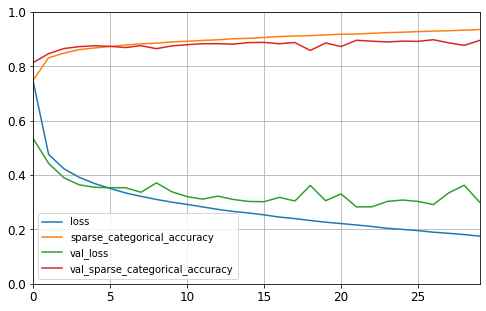

In [0]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.3350 - sparse_categorical_accuracy: 0.8874


[0.3349996919631958, 0.8874]